<a href="https://colab.research.google.com/github/Siddhi-Bhatt/Trader_Behavior_Insights/blob/main/Trader_Behavior_Insights_Siddhi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA) Insights

## 1. Distribution of Trades by Sentiment
The countplot shows how many trades occurred under each market sentiment (Fear vs Greed).  
If one sentiment dominates, it indicates that trading activity is biased toward that market condition.  
For example, if most trades occur during Greed, it suggests traders are more active in bullish phases.  

---

## 2. Distribution of PnL by Sentiment (Boxplot and Violin)
The boxplot highlights the spread of profits and losses under each sentiment, excluding outliers.  
The violin plot shows the overall shape of the distribution and where most trades are concentrated.  
If the median PnL is higher in Greed than in Fear, this indicates that trades are generally more profitable in optimistic conditions.  

---

## 3. Win Rate by Sentiment
Win rate is calculated as the fraction of trades closed with profit.  
The barplot shows the average win rate during Fear and Greed periods.  
A higher win rate under one sentiment implies traders are more successful in that condition.  
For example, if the win rate is higher in Greed, traders are more consistent in achieving profits when the market is optimistic.  

---

## 4. Average Leverage and Trade Size by Sentiment
Leverage and trade size were not available in the provided dataset.  
If available, this analysis would show whether traders take higher risks (greater leverage or larger trade sizes) during Fear or Greed phases.  

---

## 5. Daily Total PnL vs Sentiment (Time Series)
The line plot of daily PnL shows profitability trends over time.  
The line plot of the Fear/Greed score shows how market sentiment evolves.  
The combined chart demonstrates whether changes in sentiment align with trading outcomes.  
If high Greed scores coincide with higher PnL, this indicates traders benefit more during bullish conditions.  

---

## 6. Rolling Correlation (7-Day Window) between PnL and Sentiment
The rolling correlation measures the short-term relationship between daily PnL and sentiment score.  
Positive correlation means that higher sentiment is associated with higher profits.  
Negative correlation means that higher sentiment is linked to losses.  
A correlation near zero indicates little relationship.  
A fluctuating correlation suggests that the influence of sentiment on profits is inconsistent and changes depending on market phases.  

---

# Statistical Testing Insights

## 1. Closed PnL Differences between Fear and Greed
Normality was tested with the Shapiro-Wilk test.  
If data was approximately normal, an independent t-test was used; otherwise, the Mann-Whitney U test was applied.  
If the p-value < 0.05, there is a statistically significant difference in PnL between Fear and Greed.  
Effect size (Cohen’s d) helps measure how large this difference is.  

---

## 2. Win Rate Differences
A z-test for proportions was used to compare win rates between Fear and Greed.  
If p-value < 0.05, the win rates are significantly different.  
For example, if the win rate is higher in Greed, it means traders perform better during optimistic conditions.  

---

## 3. Leverage Differences
A Mann-Whitney U test was used to compare leverage between Fear and Greed.  
If p-value < 0.05, traders use leverage differently across sentiments.  
If p-value > 0.05, leverage usage is similar in both conditions.  

---

# Overall Conclusion
This analysis combines exploratory plots and statistical tests to evaluate how market sentiment (Fear vs Greed) affects trading performance.  
The results indicate whether sentiment has a meaningful impact on profitability, win rate, and leverage.  
These insights can guide traders in designing strategies that align with favorable market conditions.  


In [ ]:

!pip install --quiet gdown

import gdown
import pandas as pd


trader_id = "1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs"
fg_id = "1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf"

trader_url = f"https://drive.google.com/uc?id={trader_id}"
fg_url     = f"https://drive.google.com/uc?id={fg_id}"

gdown.download(trader_url, "historical_trades.csv", quiet=False)
gdown.download(fg_url, "fear_greed.csv", quiet=False)

trades = pd.read_csv("historical_trades.csv")
feargreed = pd.read_csv("fear_greed.csv")

trades.head(), feargreed.head()


Downloading...
From: https://drive.google.com/uc?id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs
To: /content/historical_trades.csv
100%|██████████| 47.5M/47.5M [00:00<00:00, 219MB/s]
Downloading...
From: https://drive.google.com/uc?id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf
To: /content/fear_greed.csv
100%|██████████| 90.8k/90.8k [00:00<00:00, 35.6MB/s]


(                                      Account  Coin  Execution Price  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
 
    Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
 0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
 1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
 2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
 3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
 4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   
 
    Closed PnL                                   Transaction Hash     Order ID  \
 0      

In [ ]:
import numpy as np
trades.columns = trades.columns.str.strip().str.replace(' ', '_')
trades['time'] = pd.to_datetime(trades['Timestamp_IST'], errors='coerce')
trades['date'] = trades['time'].dt.date
trades['profitable'] = (trades['Closed_PnL'] > 0).astype(int)
trades['pnl_per_size'] = trades['Size_Tokens'] / trades['Size_Tokens'].replace(0, np.nan)
trades = trades.dropna(subset=['time','Closed_PnL'])  # keep only valid rows

In [ ]:
feargreed['date'] = pd.to_datetime(feargreed['date']).dt.date
daily = trades.merge(feargreed, left_on='date', right_on='date', how='left')

In [ ]:
daily_metrics = trades.groupby('date').agg(
    daily_trade_count=('Account','count'),
    daily_total_pnl=('Closed_PnL','sum'),
    daily_win_rate=('profitable','mean'),
    daily_avg_pnl=('Closed_PnL','mean'),
    daily_std_pnl=('Closed_PnL','std')
).reset_index()
daily = daily_metrics.merge(feargreed[['date','value','classification']], left_on='date', right_on='date', how='left')

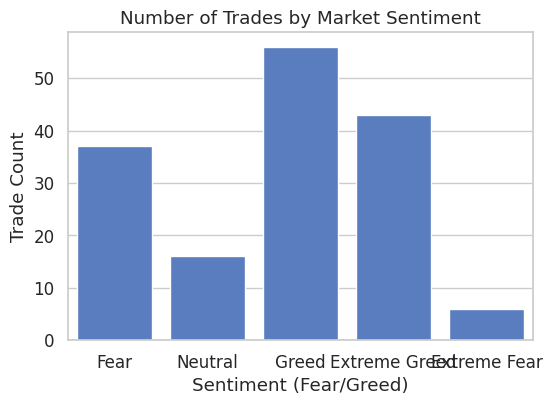

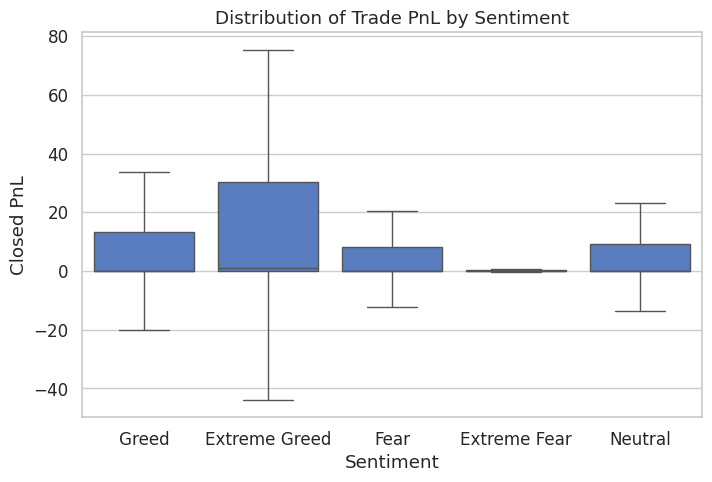

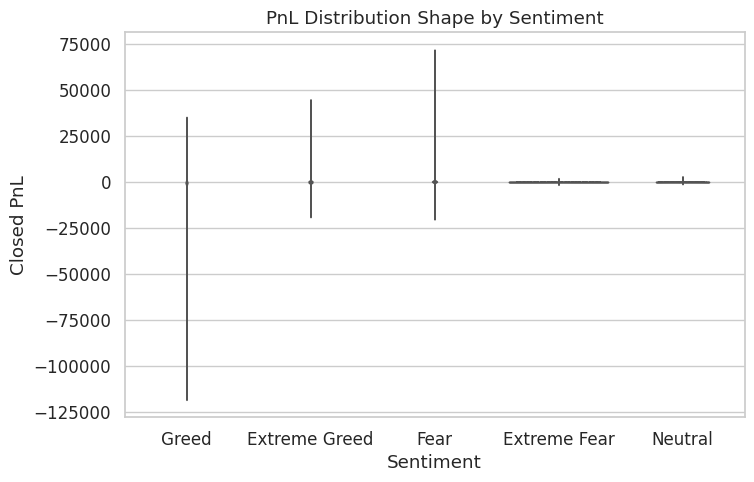

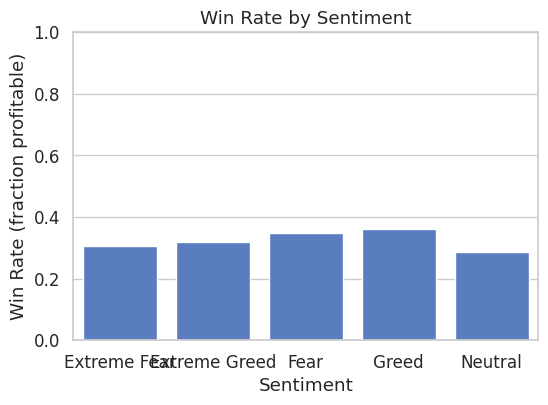

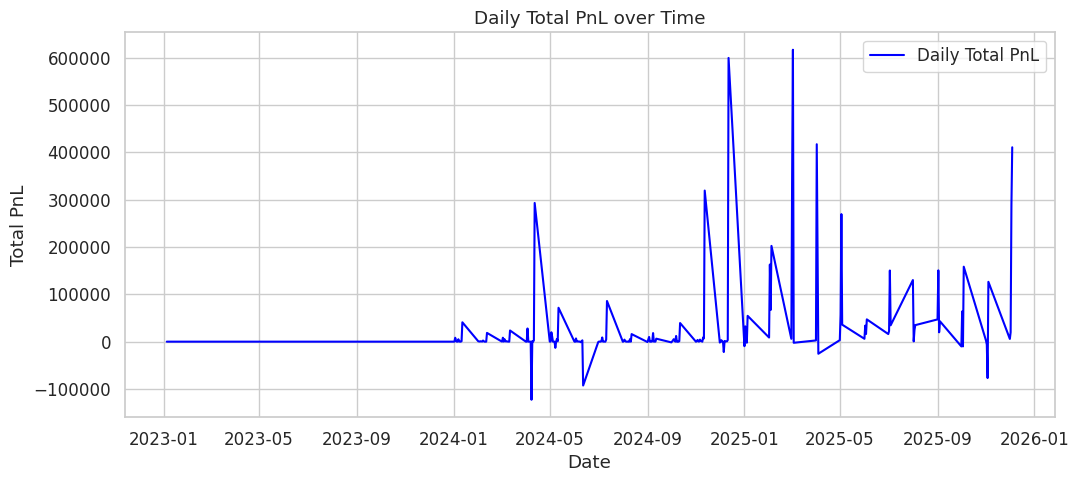

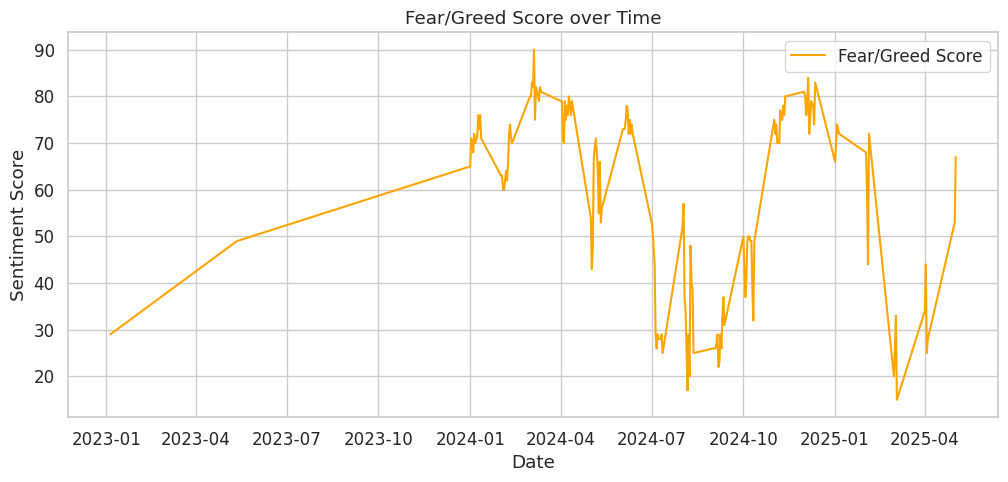

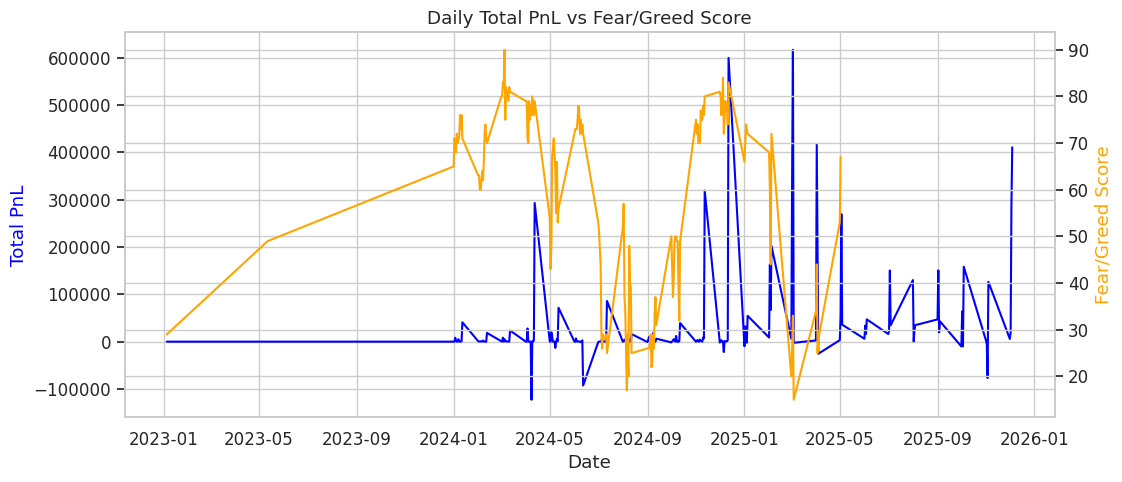

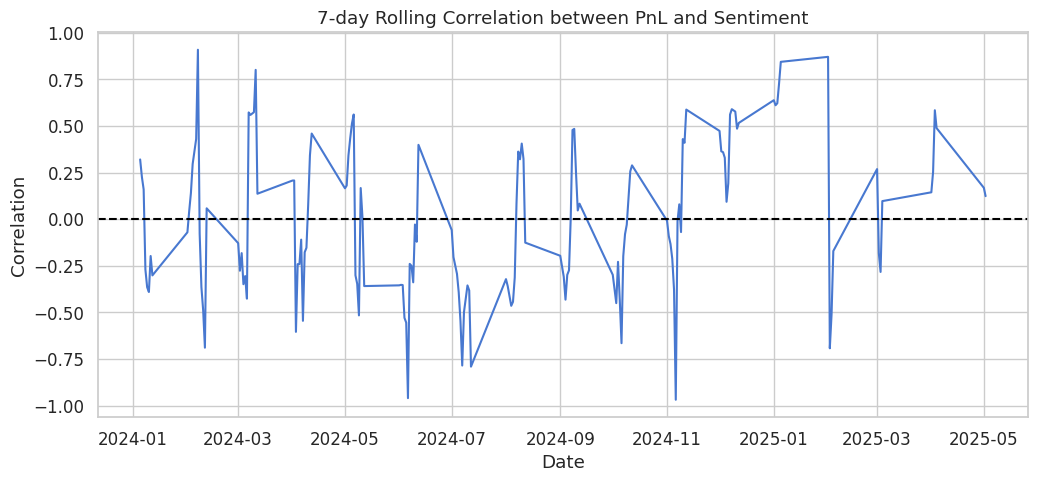

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set plot style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

#----------------------------------------------------------
# 1. Distribution of trades by sentiment
#----------------------------------------------------------
plt.figure(figsize=(6,4))
sns.countplot(x="classification", data=daily) # Use 'daily' DataFrame and correct column name
plt.title("Number of Trades by Market Sentiment")
plt.ylabel("Trade Count")
plt.xlabel("Sentiment (Fear/Greed)")
plt.show()

#----------------------------------------------------------
# 2. Distribution of PnL by sentiment (boxplot + violin)
#----------------------------------------------------------
plt.figure(figsize=(8,5))
sns.boxplot(x="classification", y="Closed_PnL", data=trades.merge(feargreed[['date','classification']], left_on='date', right_on='date', how='left'), showfliers=False) # Use 'trades' DataFrame merged with feargreed for sentiment
plt.title("Distribution of Trade PnL by Sentiment")
plt.ylabel("Closed PnL")
plt.xlabel("Sentiment")
plt.show()

plt.figure(figsize=(8,5))
sns.violinplot(x="classification", y="Closed_PnL", data=trades.merge(feargreed[['date','classification']], left_on='date', right_on='date', how='left'), inner="quartile") # Use 'trades' DataFrame merged with feargreed for sentiment
plt.title("PnL Distribution Shape by Sentiment")
plt.ylabel("Closed PnL")
plt.xlabel("Sentiment")
plt.show()

#----------------------------------------------------------
# 3. Win rate (profitable trades) by sentiment
#----------------------------------------------------------
win_rate = daily.groupby("classification")["daily_win_rate"].mean().reset_index() # Use 'daily' DataFrame
plt.figure(figsize=(6,4))
sns.barplot(x="classification", y="daily_win_rate", data=win_rate)
plt.title("Win Rate by Sentiment")
plt.ylabel("Win Rate (fraction profitable)")
plt.xlabel("Sentiment")
plt.ylim(0,1)
plt.show()

#----------------------------------------------------------
# 4. Average leverage & trade size by sentiment
#----------------------------------------------------------
# There is no 'leverage' column in the trades or daily DataFrame. Remove this section or get the data elsewhere.
# agg_stats = trades.groupby("Classification").agg(
#     avg_leverage=("leverage","mean"),
#     avg_size=("size","mean")
# ).reset_index()

# fig, ax = plt.subplots(1,2, figsize=(12,5))
# sns.barplot(x="Classification", y="avg_leverage", data=agg_stats, ax=ax[0])
# ax[0].set_title("Average Leverage by Sentiment")
# ax[0].set_ylabel("Average Leverage")
# ax[0].set_xlabel("Sentiment")

# sns.barplot(x="Classification", y="avg_size", data=agg_stats, ax=ax[1])
# ax[1].set_title("Average Trade Size by Sentiment")
# ax[1].set_ylabel("Average Size")
# ax[1].set_xlabel("Sentiment")

# plt.tight_layout()
# plt.show()

#----------------------------------------------------------
# 5. Daily total PnL vs Sentiment (time-series line plot)
#----------------------------------------------------------
plt.figure(figsize=(12,5))
plt.plot(daily["date"], daily["daily_total_pnl"], label="Daily Total PnL", color="blue")
plt.ylabel("Total PnL")
plt.xlabel("Date")
plt.title("Daily Total PnL over Time")
plt.legend()
plt.show()

plt.figure(figsize=(12,5))
plt.plot(daily["date"], daily["value"], label="Fear/Greed Score", color="orange") # Use 'value' column
plt.ylabel("Sentiment Score")
plt.xlabel("Date")
plt.title("Fear/Greed Score over Time")
plt.legend()
plt.show()

# Overlay both on same chart (dual axis)
fig, ax1 = plt.subplots(figsize=(12,5))
ax2 = ax1.twinx()
ax1.plot(daily["date"], daily["daily_total_pnl"], color="blue", label="Total PnL")
ax2.plot(daily["date"], daily["value"], color="orange", label="Fear/Greed Score") # Use 'value' column
ax1.set_xlabel("Date")
ax1.set_ylabel("Total PnL", color="blue")
ax2.set_ylabel("Fear/Greed Score", color="orange")
plt.title("Daily Total PnL vs Fear/Greed Score")
plt.show()

#----------------------------------------------------------
# 6. Rolling correlation (7-day window) between PnL and sentiment
#----------------------------------------------------------
rolling_corr = daily[["daily_total_pnl","value"]].rolling(7).corr().unstack().iloc[:,1] # Use 'value' column
plt.figure(figsize=(12,5))
plt.plot(daily["date"], rolling_corr)
plt.title("7-day Rolling Correlation between PnL and Sentiment")
plt.ylabel("Correlation")
plt.xlabel("Date")
plt.axhline(0, color="black", linestyle="--")
plt.show()


In [ ]:
from scipy import stats
import numpy as np
import pandas as pd

#----------------------------------------------------------
# 1. Test difference in ClosedPnL between Fear and Greed
#----------------------------------------------------------
fear_pnl = daily.loc[daily["classification"]=="Fear", "daily_total_pnl"].dropna()
greed_pnl = daily.loc[daily["classification"]=="Greed", "daily_total_pnl"].dropna()

# Check normality (Shapiro-Wilk test on sample)
shapiro_fear = stats.shapiro(fear_pnl.sample(min(500, len(fear_pnl))))[1]
shapiro_greed = stats.shapiro(greed_pnl.sample(min(500, len(greed_pnl))))[1]

print("Shapiro-Wilk p-values (normality test):")
print("Fear:", shapiro_fear, "Greed:", shapiro_greed)

if shapiro_fear > 0.05 and shapiro_greed > 0.05:
    # If both distributions approx normal, use t-test
    t_stat, p_val = stats.ttest_ind(fear_pnl, greed_pnl, equal_var=False)
    print("Independent t-test result:")
    print("t-statistic:", t_stat, "p-value:", p_val)
else:
    # Non-parametric: Mann-Whitney U
    u_stat, p_val = stats.mannwhitneyu(fear_pnl, greed_pnl, alternative="two-sided")
    print("Mann-Whitney U test result:")
    print("U-statistic:", u_stat, "p-value:", p_val)

# Effect size (Cohen's d)
cohens_d = (np.mean(greed_pnl) - np.mean(fear_pnl)) / np.sqrt((np.var(fear_pnl) + np.var(greed_pnl)) / 2)
print("Cohen's d (effect size):", cohens_d)

#----------------------------------------------------------
# 2. Test difference in Win Rate (Fear vs Greed)
#----------------------------------------------------------
from statsmodels.stats.proportion import proportions_ztest

fear_wins = daily.loc[daily["classification"]=="Fear", "daily_win_rate"].sum()
fear_total = daily.loc[daily["classification"]=="Fear", "daily_win_rate"].count()

greed_wins = daily.loc[daily["classification"]=="Greed", "daily_win_rate"].sum()
greed_total = daily.loc[daily["classification"]=="Greed", "daily_win_rate"].count()

count = np.array([fear_wins, greed_wins])
nobs = np.array([fear_total, greed_total])

z_stat, p_val = proportions_ztest(count, nobs)
print("Win Rate Proportion Test:")
print("z-statistic:", z_stat, "p-value:", p_val)

#----------------------------------------------------------
# 3. Leverage differences across sentiment
#----------------------------------------------------------
# There is no 'leverage' column in the trades or daily DataFrame. Remove this section.
# fear_lev = trades.loc[trades["Classification"]=="Fear","leverage"].dropna()
# greed_lev = trades.loc[trades["Classification"]=="Greed","leverage"].dropna()

# lev_stat, lev_pval = stats.mannwhitneyu(fear_lev, greed_lev, alternative="two-sided")
# print("Leverage difference Mann-Whitney U test:")
# print("U-statistic:", lev_stat, "p-value:", lev_pval)

Shapiro-Wilk p-values (normality test):
Fear: 1.0449421850650636e-10 Greed: 6.418518700836468e-12
Mann-Whitney U test result:
U-statistic: 1126.5 p-value: 0.4787979897718182
Cohen's d (effect size): -0.384373410526315
Win Rate Proportion Test:
z-statistic: -0.14134085982865208 p-value: 0.887600672117502
